**Financial Statement Analysis:**

**Scenario:** You are a Data Scientist working for a consulting firm. One of your colleagues from the Auditing department has asked you to help them assess the financial statement of organisation X.

We need to calculate the following parameters for the give Revenue and Expenses:

- profit for each month
- profit after tax for each month (the tax rate is 30%)
- profit margin for each month - equals to profit after tax divided by revenue
- good months - where the profit after tax was greater than the mean for the year
- bad months - where the profit after tax was less than the mean for the year
- the best month - where the profit after tax was max for the year
- the worst month - where the profit after tax was min for the year

Results should be rounded to 2 decimal positions.

As an input for analysis we have two lists:
- 'revenue' contains revenue per month for the financial year;
- 'expenses' contains expense per month for the financial year

I assume during the task implementation built in functions to operate on list are expected, since the chapter of the course is dedicated to lists. However we will be working with DataFrames, because we already know what it is. For mat calculations we are going to use pandas library, not numpy.

In [179]:
# Let us import pandas 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
# Here is our input, it is given as pre-condition to the task. Let us run the cell and create lists in memory.
revenue = [14574.49, 7606.46, 8611.41, 9175.41, 8058.65, 8105.44, 11496.28, 9766.09, 10305.32, 14379.96, 10713.97, 15433.50]
expenses = [12051.82, 5695.07, 12319.20, 12089.72, 8658.57, 840.20, 3285.73, 5821.12, 6976.93, 16618.61, 10054.37, 3803.96]

Let us define the following strategy:
- create a dataframe itself and write into 'Revenue' and 'Expenses' columns the content of two lists above;
- for each parameter add a new column of 'float' / 'str' type;
- add 'Month' column, since we are working with financial year data

In [181]:
# Let us declare a new list and add there months' names
months = ['January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December']
# Convert lists into a DataFrame and load 'Months', 'Revenue', 'Expenses' with relevant data
df = pd.DataFrame({'Month':months, 'Revenue': revenue, 'Expenses': expenses, 'Profit': float, 'Profit_After_Tax_Month':float, 'Profit_Margin_Month':float, 'Good_Month':str, 'Bad_Month':str, 'Best_Month':str, 'Worst_Month':str})
# And check the result
df.head()

# Output contains 12 records and all the columns we need

,Month,Revenue,Expenses,Profit,Profit_After_Tax_Month,Profit_Margin_Month,Good_Month,Bad_Month,Best_Month,Worst_Month
0,January,14574.49,12051.82,<class 'float'>,<class 'float'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
1,February,7606.46,5695.07,<class 'float'>,<class 'float'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
2,March,8611.41,12319.20,<class 'float'>,<class 'float'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
3,April,9175.41,12089.72,<class 'float'>,<class 'float'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
4,May,8058.65,8658.57,<class 'float'>,<class 'float'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>


Let us calculate the first parameter: 'Profit for each month' using this formula = Revenue (for each month) − Expense (for each month):

In [182]:
# pandas is doing it for us
df['Profit'] = df['Revenue'] - df['Expenses']
# Check results
df.head()

# As you can see, Profit per months is filled with data

,Month,Revenue,Expenses,Profit,Profit_After_Tax_Month,Profit_Margin_Month,Good_Month,Bad_Month,Best_Month,Worst_Month
0,January,14574.49,12051.82,2522.67,<class 'float'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
1,February,7606.46,5695.07,1911.39,<class 'float'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
2,March,8611.41,12319.20,-3707.79,<class 'float'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
3,April,9175.41,12089.72,-2914.31,<class 'float'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
4,May,8058.65,8658.57,-599.92,<class 'float'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>


Let us calculate 'Profit after tax for each month' (the tax rate is 30%)
Here is the flow:

- Profit = $2000 - $1500 = $500
- Tax = $500 × 30% = $150
- Profit After Tax = $500 - $150 = $350

In [183]:
# Let us do it in one line and round result to 2 digits:
df['Profit_After_Tax_Month'] = round((df['Profit'] * 0.7),2)
# Check
df.head()

# Profit_After_Tax_Month is filled with data

,Month,Revenue,Expenses,Profit,Profit_After_Tax_Month,Profit_Margin_Month,Good_Month,Bad_Month,Best_Month,Worst_Month
0,January,14574.49,12051.82,2522.67,1765.87,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
1,February,7606.46,5695.07,1911.39,1337.97,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
2,March,8611.41,12319.20,-3707.79,-2595.45,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
3,April,9175.41,12089.72,-2914.31,-2040.02,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
4,May,8058.65,8658.57,-599.92,-419.94,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>


Let us calculate: 'Profit margin for each month', it equals to profit after tax divided by revenue

In [184]:
# calculation, let us round results to 2 digits:
df['Profit_Margin_Month'] = round((df['Profit_After_Tax_Month'] / df['Revenue']),2)
# Check
df.head()

# Profit_Margin_Month is filled with data



,Month,Revenue,Expenses,Profit,Profit_After_Tax_Month,Profit_Margin_Month,Good_Month,Bad_Month,Best_Month,Worst_Month
0,January,14574.49,12051.82,2522.67,1765.87,0.12,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
1,February,7606.46,5695.07,1911.39,1337.97,0.18,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
2,March,8611.41,12319.20,-3707.79,-2595.45,-0.30,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
3,April,9175.41,12089.72,-2914.31,-2040.02,-0.22,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
4,May,8058.65,8658.57,-599.92,-419.94,-0.05,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>


Let us calculate a good months - where the profit after tax was greater than the mean for the year:

In [185]:
# Let us calculate mean_profit_after_tax, we are using pandas mean() function
mean_profit_after_tax = df['Profit_After_Tax_Month'].mean()

# Check
mean_profit_after_tax

1750.6808333333336

In [186]:
# Here let us apply lambda function. Let us put 'yes' when the condition is met and 'no' when does not:
df['Good_Month'] = df['Profit_After_Tax_Month'].apply(lambda x: 'yes' if x > mean_profit_after_tax else 'no')

# Check all the records
df.head(12)

# Good_Months  column is filled


,Month,Revenue,Expenses,Profit,Profit_After_Tax_Month,Profit_Margin_Month,Good_Month,Bad_Month,Best_Month,Worst_Month
0,January,14574.49,12051.82,2522.67,1765.87,0.12,yes,<class 'str'>,<class 'str'>,<class 'str'>
1,February,7606.46,5695.07,1911.39,1337.97,0.18,no,<class 'str'>,<class 'str'>,<class 'str'>
2,March,8611.41,12319.20,-3707.79,-2595.45,-0.30,no,<class 'str'>,<class 'str'>,<class 'str'>
3,April,9175.41,12089.72,-2914.31,-2040.02,-0.22,no,<class 'str'>,<class 'str'>,<class 'str'>
4,May,8058.65,8658.57,-599.92,-419.94,-0.05,no,<class 'str'>,<class 'str'>,<class 'str'>
5,June,8105.44,840.20,7265.24,5085.67,0.63,yes,<class 'str'>,<class 'str'>,<class 'str'>
6,July,11496.28,3285.73,8210.55,5747.38,0.50,yes,<class 'str'>,<class 'str'>,<class 'str'>
7,August,9766.09,5821.12,3944.97,2761.48,0.28,yes,<class 'str'>,<class 'str'>,<class 'str'>
8,September,10305.32,6976.93,3328.39,2329.87,0.23,yes,<class 'str'>,<class 'str'>,<class 'str'>
9,October,14379.96,16618.61,-2238.65,-1567.06,-0.11,no,<class 'str'>,<class 'str'>,<class 'str'>


And here comes a 'bad month', this is where the profit after tax was less than the mean for the year:

In [187]:
# Here let us apply lambda function. Let us put 'yes' when the condition is met and 'no' when does not:
df['Bad_Month'] = df['Profit_After_Tax_Month'].apply(lambda x: 'yes' if x < mean_profit_after_tax else 'no')

# Check all the records
df.head(12)

# Bad_Month  column is filled


,Month,Revenue,Expenses,Profit,Profit_After_Tax_Month,Profit_Margin_Month,Good_Month,Bad_Month,Best_Month,Worst_Month
0,January,14574.49,12051.82,2522.67,1765.87,0.12,yes,no,<class 'str'>,<class 'str'>
1,February,7606.46,5695.07,1911.39,1337.97,0.18,no,yes,<class 'str'>,<class 'str'>
2,March,8611.41,12319.20,-3707.79,-2595.45,-0.30,no,yes,<class 'str'>,<class 'str'>
3,April,9175.41,12089.72,-2914.31,-2040.02,-0.22,no,yes,<class 'str'>,<class 'str'>
4,May,8058.65,8658.57,-599.92,-419.94,-0.05,no,yes,<class 'str'>,<class 'str'>
5,June,8105.44,840.20,7265.24,5085.67,0.63,yes,no,<class 'str'>,<class 'str'>
6,July,11496.28,3285.73,8210.55,5747.38,0.50,yes,no,<class 'str'>,<class 'str'>
7,August,9766.09,5821.12,3944.97,2761.48,0.28,yes,no,<class 'str'>,<class 'str'>
8,September,10305.32,6976.93,3328.39,2329.87,0.23,yes,no,<class 'str'>,<class 'str'>
9,October,14379.96,16618.61,-2238.65,-1567.06,-0.11,no,yes,<class 'str'>,<class 'str'>


Let us find the 'best month' the best month, this is where the profit after tax was max for the year

In [188]:
# Here we also apply lambda function. Here we are looking for max value in 'Profit_After_Tax_Month' column
df['Best_Month'] = df['Profit_After_Tax_Month'].apply(lambda x: 'yes' if x == df['Profit_After_Tax_Month'].max() else 'no')
# Check
df.head(12)

# Best_Month is December, it contains 'yes'. That is expected, there is Christmas / New Year


,Month,Revenue,Expenses,Profit,Profit_After_Tax_Month,Profit_Margin_Month,Good_Month,Bad_Month,Best_Month,Worst_Month
0,January,14574.49,12051.82,2522.67,1765.87,0.12,yes,no,no,<class 'str'>
1,February,7606.46,5695.07,1911.39,1337.97,0.18,no,yes,no,<class 'str'>
2,March,8611.41,12319.20,-3707.79,-2595.45,-0.30,no,yes,no,<class 'str'>
3,April,9175.41,12089.72,-2914.31,-2040.02,-0.22,no,yes,no,<class 'str'>
4,May,8058.65,8658.57,-599.92,-419.94,-0.05,no,yes,no,<class 'str'>
5,June,8105.44,840.20,7265.24,5085.67,0.63,yes,no,no,<class 'str'>
6,July,11496.28,3285.73,8210.55,5747.38,0.50,yes,no,no,<class 'str'>
7,August,9766.09,5821.12,3944.97,2761.48,0.28,yes,no,no,<class 'str'>
8,September,10305.32,6976.93,3328.39,2329.87,0.23,yes,no,no,<class 'str'>
9,October,14379.96,16618.61,-2238.65,-1567.06,-0.11,no,yes,no,<class 'str'>


Let us calculate 'worst month' - where the profit after tax was min for the whole financial year

In [189]:
# calculation
df['Worst_Month'] = df['Profit_After_Tax_Month'].apply(lambda x: 'yes' if x == df['Profit_After_Tax_Month'].min() else 'no')

# Check
df.head(12)

# March is the worst month

,Month,Revenue,Expenses,Profit,Profit_After_Tax_Month,Profit_Margin_Month,Good_Month,Bad_Month,Best_Month,Worst_Month
0,January,14574.49,12051.82,2522.67,1765.87,0.12,yes,no,no,no
1,February,7606.46,5695.07,1911.39,1337.97,0.18,no,yes,no,no
2,March,8611.41,12319.20,-3707.79,-2595.45,-0.30,no,yes,no,yes
3,April,9175.41,12089.72,-2914.31,-2040.02,-0.22,no,yes,no,no
4,May,8058.65,8658.57,-599.92,-419.94,-0.05,no,yes,no,no
5,June,8105.44,840.20,7265.24,5085.67,0.63,yes,no,no,no
6,July,11496.28,3285.73,8210.55,5747.38,0.50,yes,no,no,no
7,August,9766.09,5821.12,3944.97,2761.48,0.28,yes,no,no,no
8,September,10305.32,6976.93,3328.39,2329.87,0.23,yes,no,no,no
9,October,14379.96,16618.61,-2238.65,-1567.06,-0.11,no,yes,no,no


We are done with the task, but let us also create a nice plot as a cherry on the top

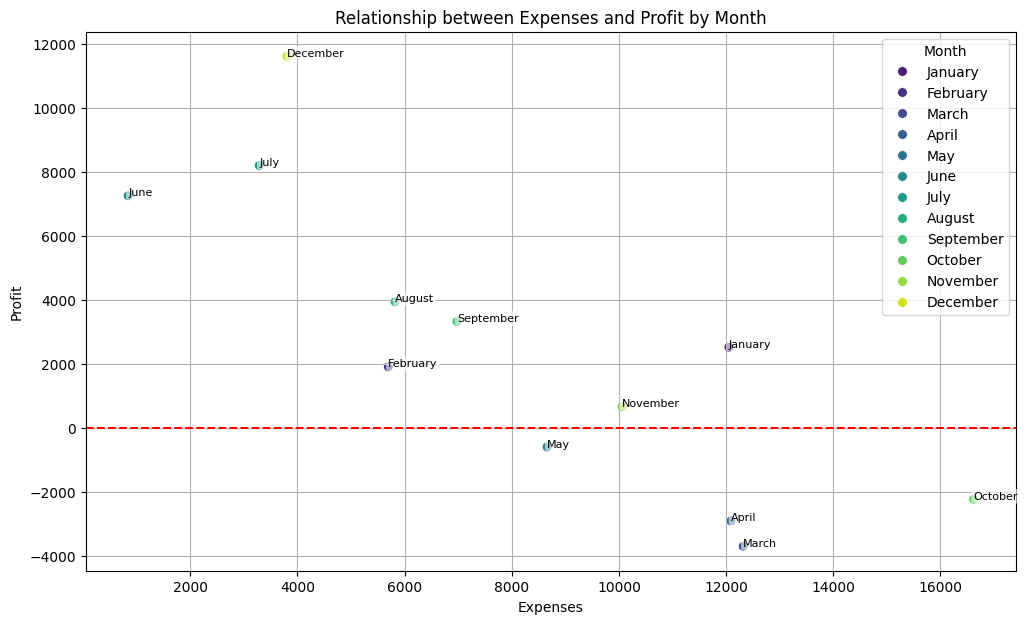

In [191]:
# Relationship between Expenses and Profit by Month, scatter plot with labeled data points
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Expenses', y='Profit', hue='Month', data=df, s=50, palette='viridis')
plt.title('Relationship between Expenses and Profit by Month')
plt.xlabel('Expenses')
plt.ylabel('Profit')

# Annotate each data point with its month
for i in range(len(df)):
    # associate Expense and Profit for a month with the month on the plot
    plt.text(x=df['Expenses'][i], y=df['Profit'][i], s=df['Month'][i], 
             fontdict=dict(color='black', size=8), 
             bbox=dict(facecolor='white', edgecolor='none', alpha=0.6, boxstyle='round,pad=0.2'))

# For better visualization
plt.axhline(y=0, color='red', linestyle='--', label='Zero Profit Line')  
plt.grid(True)
plt.show()
